<a href="https://colab.research.google.com/github/JinLeeGG/AI_Project_Preparation/blob/main/4.%20Deep%20Learning/4.%20number%20handwriting%20dataset/4_number_handwriting_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://ryuzyproject.tistory.com/75?category=1177429

dataset:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

# 1. 손 글씨 숫자 데이터셋
손글씨 숫자 데이터셋은 0부터 9까지의 숫자를 손글씨로 쓴 흑백 이미지로 구성되어 있으며, 각 이미지는 8x8 픽셀 크기의 64차원 벡터로 표현됩니다. 각 픽셀 값은 0(흰색)에서 16(검은색)까지의 명암값을 가집니다. 이 데이터는 총 1797개의 샘플로 이루어져 있으며, 각 샘플에는 숫자 클래스(0~9)가 레이블로 붙어 있습니다. 주로 분류 알고리즘을 학습시키거나 데이터 시각화, 차원 축소 기법 등을 실험하는 데 사용됩니다.



In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # dataset을 불러오기 위한 load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader # batch 단위로 나누어서 데이터셋을 모델에 제공

In [47]:
# 데이터 불러오기
digits = load_digits()

# 데이터 보기
X_data = digits['data'] # 밝기 데이터가 들어있다.
X_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [48]:
y_data = digits['target']
y_data # 정답이 들어있다.

array([0, 1, 2, ..., 8, 9, 8])

In [49]:
print(X_data.shape) # 이미지 자체
print(y_data.shape) # 정답

(1797, 64)
(1797,)


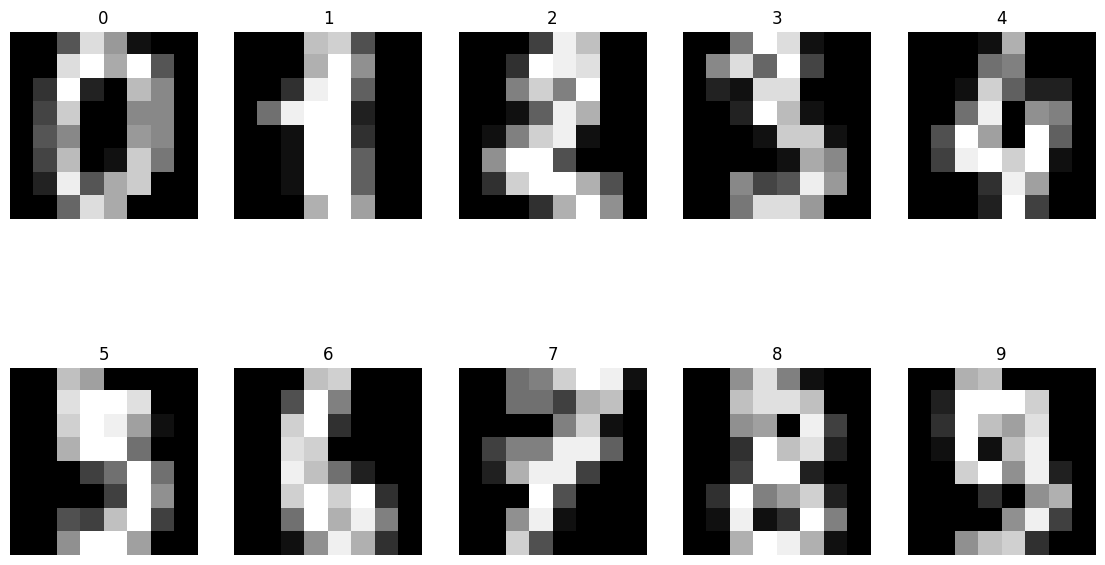

In [50]:
# 데이터 보기
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8)) # 축을 2행 5열

for i, ax in enumerate(axes.flatten()): # 일렬로 만드는 과정 (10바퀴를 돌린다.)
    ax.imshow(X_data[i].reshape((8, 8)), cmap='gray')
    ax.set_title(y_data[i])
    ax.axis('off')

In [51]:
X_data = torch.FloatTensor(X_data)
y_data = torch.LongTensor(y_data) # 결과가 class로 나올것이기 때문에 LongTensor로 넣어준다.

print(X_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [52]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2025)
print(x_train.shape, y_train.shape) # train data
print(x_test.shape, y_test.shape) # test data

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


# 2. 데이터 로더
데이터로더(Data Loader)는 데이터셋을 효율적으로 관리하고, 모델 학습 과정에서 데이터를 쉽게 가져올 수 있도록 도와주는 도구입니다. 일반적으로 데이터셋을 배치(batch) 단위로 나누어 모델에 제공하며, 데이터의 크기가 클 경우에도 메모리 효율적으로 처리할 수 있도록 설계되었습니다. 데이터 증강, 셔플링, 병렬 처리와 같은 기능을 지원하여 학습 성능을 향상시키고, 모델 학습과 평가 시 일관된 데이터 제공 방식을 유지합니다. 딥러닝 프레임워크에서는 PyTorch의 DataLoader나 TensorFlow의 tf.data 같은 도구를 통해 쉽게 사용할 수 있습니다.

### ※ 데이터로더의 주요 역할

1. 배치 처리: 데이터를 지정된 크기의 배치로 나누어 모델에 제공.
2. 셔플링: 데이터 순서를 무작위로 섞어 과적합 방지.
3. 병렬 처리: num_workers 옵션을 통해 데이터를 병렬로 로드하여 속도 향상.
4. 반복 처리: 학습 epoch 동안 데이터를 자동으로 반복해서 제공.

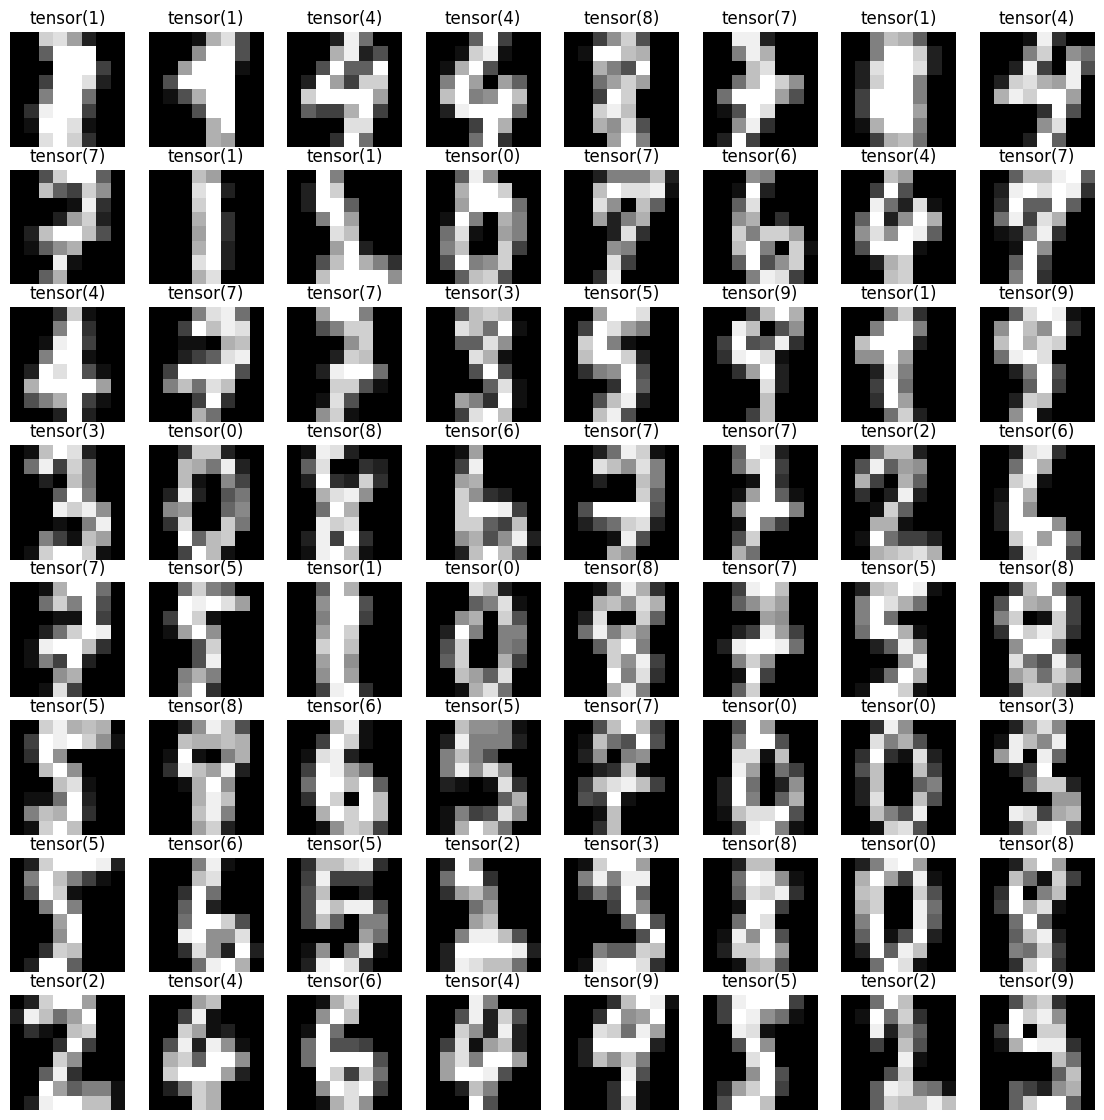

In [53]:
loader = DataLoader(
    dataset = list(zip(x_train, y_train)), # 문제집 데이터(x_train)와 정답 데이터(y_train)를 하나씩 짝지어 전체 데이터셋을 만듭니다.
    batch_size = 64, # 64개씩 데이터를 제공
    shuffle = True, # 데이터 섞임을 True
    drop_last = False # 학습하고 남은 데이터를 버리지 않고 사용한다.
)

# 64개의 img, 정답들을 각각 뽑아준다.
imgs, labels = next(iter(loader)) #iter() iterator로 만들어주는 함수 (순서가 있는 함수 )

# 시각화
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

### ※ axes.flatten()

axes.flatten()은 다차원 배열 형태로 구성된 Matplotlib의 서브플롯 배열을 1차원 배열로 변환하는 메서드입니다. Matplotlib에서 다수의 서브플롯을 생성할 때, plt.subplots()는 2차원 배열 형태로 서브플롯 객체를 반환합니다. 이 배열은 각 서브플롯을 접근하기 위해 행과 열의 인덱스를 사용해야 하지만, flatten() 메서드를 사용하면 이 배열을 1차원으로 펼쳐서 각 서브플롯을 단일 인덱스로 순회할 수 있게 됩니다.

In [54]:
model = nn.Sequential(
    nn.Linear(64, 10) # 64개의 인풋, 10개 아웃풋
)

optimizer = optim.Adam(model.parameters(), lr=0.01) # optimizer

epochs = 50 # 50바퀴동안 학습
for epoch in range(epochs + 1):
    sum_losses = 0 # 전체 lost 값
    sum_accs = 0 # 전체 accuracy 값

    # x_batch 이미지, ybatch 정답
    for x_batch, y_batch in loader:  # loader의 개수만큼 돌기 1437개/64 의 값
        y_pred = model(x_batch) # 이미지를 넣어서 예측
        loss = nn.CrossEntropyLoss()(y_pred, y_batch) # 다항으로 분류

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss # 오차값 누적 업데이트

        y_prob = nn.Softmax(1)(y_pred) # 확률적으로 누가 가장 높은지 뽑기

        y_pred_index = torch.argmax(y_prob, axis=1) # 그 인덱스번호를 이 확률에서 구해주기 (0~9중)

        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100 # accuracy 구하기

        sum_accs = sum_accs + acc # 정확도 누적 업데이트

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)
    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/50 Loss: 1.623254 Accuracy: 60.41%
Epoch    1/50 Loss: 0.285067 Accuracy: 91.72%
Epoch    2/50 Loss: 0.177013 Accuracy: 94.06%
Epoch    3/50 Loss: 0.124482 Accuracy: 95.92%
Epoch    4/50 Loss: 0.101437 Accuracy: 97.01%
Epoch    5/50 Loss: 0.086160 Accuracy: 97.62%
Epoch    6/50 Loss: 0.072557 Accuracy: 97.96%
Epoch    7/50 Loss: 0.067238 Accuracy: 98.03%
Epoch    8/50 Loss: 0.065505 Accuracy: 98.14%
Epoch    9/50 Loss: 0.068358 Accuracy: 97.88%
Epoch   10/50 Loss: 0.055087 Accuracy: 98.42%
Epoch   11/50 Loss: 0.049443 Accuracy: 98.64%
Epoch   12/50 Loss: 0.044767 Accuracy: 98.98%
Epoch   13/50 Loss: 0.047144 Accuracy: 98.56%
Epoch   14/50 Loss: 0.044470 Accuracy: 98.71%
Epoch   15/50 Loss: 0.036468 Accuracy: 99.25%
Epoch   16/50 Loss: 0.033499 Accuracy: 99.17%
Epoch   17/50 Loss: 0.031408 Accuracy: 99.32%
Epoch   18/50 Loss: 0.035331 Accuracy: 99.22%
Epoch   19/50 Loss: 0.030917 Accuracy: 99.12%
Epoch   20/50 Loss: 0.035374 Accuracy: 99.05%
Epoch   21/50 Loss: 0.025784 Accur

tensor(5)


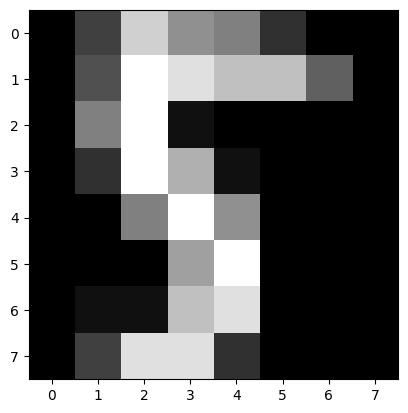

In [55]:
# 테스트 데이터 중 10번쨰 있는걸 가져온다.
# 8 * 8 로 바꿔준다.
# cmap 으로 바꾼뒤 화면에 띄어준다.
plt.imshow(x_test[10].reshape((8, 8)), cmap='gray')
print(y_test[10])

In [56]:
# 테스트를 통째로 모델에 넣어준다.
y_pred = model(x_test)
y_pred[10] # y test의 10번째는?

# weight의 의한 값들이 쭉 나온다.

tensor([ -4.6648, -11.4085,  -5.3918,  -1.4652,  -6.2488,  11.0734,  -9.6975,
          0.7465,   0.6387,  -7.0925], grad_fn=<SelectBackward0>)

In [57]:
y_prob = nn.Softmax(1)(y_pred) # 1은 행을 의미하고 0은 열을 의미한다. 따라서 이건 행을 가져온다.
y_prob[10] # 확율을 가져온다.

tensor([1.4620e-07, 1.7228e-10, 7.0670e-08, 3.5854e-06, 2.9995e-08, 9.9993e-01,
        9.5341e-10, 3.2741e-05, 2.9393e-05, 1.2901e-08],
       grad_fn=<SelectBackward0>)

In [58]:
for i in range(10):
    print(f'숫자 {i}일 확률: {y_prob[10][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 1.00
숫자 6일 확률: 0.00
숫자 7일 확률: 0.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00


In [59]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy: .2f}% 입니다.')

테스트 정확도는  97.22% 입니다.


# 3. 데이터 증강
데이터 증강(Data Augmentation)은 학습 데이터를 인위적으로 변환하여 데이터셋의 다양성을 높이고 모델의 일반화 성능을 향상시키는 기법입니다. 회전, 크기 조정, 반전, 블러링, 밝기 조정 등 다양한 변환을 적용하여 원본 데이터로부터 새로운 데이터를 생성합니다. 이를 통해 데이터 부족 문제를 완화하고 모델이 특정 패턴에 과적합되지 않도록 도와줍니다. 특히, 이미지나 음성 데이터와 같이 특징이 직관적인 데이터에서 효과적으로 활용되며, 증강된 데이터는 모델이 예측 대상의 다양한 변형에 대해 강하게 학습할 수 있도록 돕습니다.

In [60]:
from torchvision import transforms # 데이터를 변형시켜주는 모듈
from torch.utils.data import TensorDataset #  Tensor형의 데이터셋을 만들 수 있게 해주는 모듈
from torch.utils.data import Dataset

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2025)
print(X_train.shape, y_train.shape)
print(X_train.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([1437, 64]) torch.Size([360])


In [62]:
# tensor형으로 데이터셋 만들어놓기
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [63]:
# transforms는 데이터를 변환해주는 기능
# compose는 기능들을 묶어서 순차적으로 변환시켜준다.
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=5, scale=(0.9, 1.1)),
])

### ※ transforms.Compose

여러 데이터 변환(transform) 작업을 순차적으로 적용할 수 있도록 해줍니다. 이미지 데이터 전처리와 증강 과정에서 자주 사용되며, 각 변환을 하나의 리스트로 묶어 실행합니다.



1. transforms.RandomRotation(10)

    - 기능: 이미지를 -10도에서 +10도 사이로 무작위 회전시킵니다.
      - 10은 회전 범위를 나타냅니다.
      - 각 호출 시, -10도 ~ +10도 범위에서 무작위로 각도를 선택하여 이미지를 회전합니다.

2. transforms.RandomAffine(0, shear=5, scale=(0.9, 1.1))

    - 기능: 이미지를 비틀기(shear), 크기 조정(scale) 등의 변환을 수행합니다.
      - 0: 회전(각도) 변환을 수행하지 않음을 의미합니다.
      - shear=5: 이미지를 최대 5도만큼 비스듬하게 비틀기(shear) 변환을 수행합니다.

        - 예: 정사각형이 평행사변형처럼 기울어질 수 있습니다.

      - scale=(0.9, 1.1):
        - 이미지를 0.9배(축소)에서 1.1배(확대) 범위 내에서 무작위 크기 조정을 수행합니다.
        - 각 호출 시, 무작위로 크기가 변경됩니다.

In [64]:
# 직접 데이터셋 만들기
# 데이터셋 자체에다가 부여할 수 있는 기능들을 사용할수 있게 해준다.
class AugmentedDataset(Dataset):
    def __init__(self, dataset, transform):
        self.dataset = dataset
        self.transform = transform

    # len special method
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        x, y = self.dataset[idx]
        x = x.view(8, 8).unsqueeze(0)  # 8x8 이미지를 1채널로 변환 (1, 8, 8) 1은 grey채널
        x = self.transform(x)  # 증강 적용
        return x.flatten(), y  # 다시 Flatten

In [65]:
augmented_train_dataset = AugmentedDataset(train_dataset, transform)

In [69]:
len(augmented_train_dataset)

1437

In [67]:
augmented_train_dataset[0] # 색상정보, 9를 나타내는 정보

(tensor([ 0.,  0.,  9., 13.,  7.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  2.,
          0.,  0.,  0.,  0., 12., 13., 16.,  6.,  0.,  0.,  0.,  0.,  6., 16.,
         16., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,
          0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  3.,  7., 12., 14., 16.,  2.,
          0.,  0.,  7., 12., 12., 12., 11.,  0.]),
 tensor(9))

In [70]:
# 1437 / 64 = 22...번 돈다
train_loader = DataLoader(augmented_train_dataset, batch_size=64, shuffle=True)
 # 테스트는 증강할 필요가 없음으로 그대로 사용
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

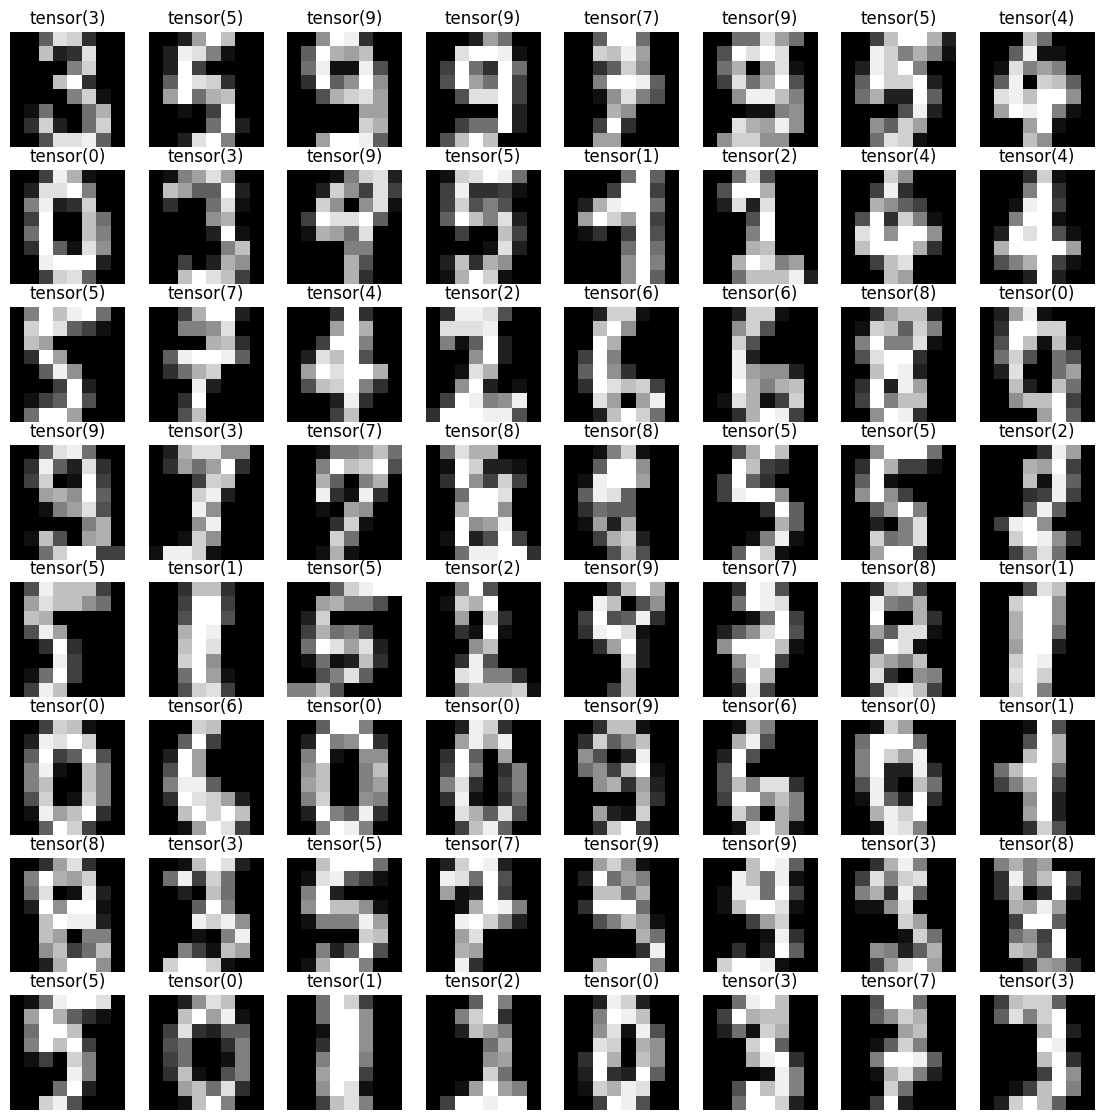

In [71]:
imgs, labels = next(iter(train_loader))
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

In [73]:
# 64 * 64 image shape
# 64 labels
for images, labels in train_loader:
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    break

Image batch shape: torch.Size([64, 64])
Label batch shape: torch.Size([64])


In [75]:
model = nn.Sequential(
    nn.Linear(64, 10)
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100

for epoch in range(epochs+1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in train_loader:
        y_pred = model(x_batch)  # 모델한테 먹이기
        loss = nn.CrossEntropyLoss()(y_pred, y_batch) # 오차값 구하기

        optimizer.zero_grad() # 가중치 갱신
        loss.backward()
        optimizer.step() # weight, bias 반영, 조정

        sum_losses = sum_losses + loss # 오차값 더하기

        y_prob = nn.Softmax(1)(y_pred)  # 예측값의 가장 높은 확율을 뽑기위해서 넣기
        y_pred_index = torch.argmax(y_prob, axis=1) # 가장 높은 확율의 인덱스 뽑기
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100  # 정확도 뽑기
        sum_accs = sum_accs + acc # 정확도 누적

    if epoch % 10 == 0: # 10마다 갱신해서 보여주기
        avg_loss = sum_losses / len(loader)
        avg_acc = sum_accs / len(loader)
        print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')


Epoch    0/100 Loss: 1.968044 Accuracy: 56.66%
Epoch   10/100 Loss: 0.075420 Accuracy: 97.61%
Epoch   20/100 Loss: 0.047813 Accuracy: 98.51%
Epoch   30/100 Loss: 0.037405 Accuracy: 98.98%
Epoch   40/100 Loss: 0.051519 Accuracy: 98.44%
Epoch   50/100 Loss: 0.034560 Accuracy: 98.71%
Epoch   60/100 Loss: 0.020270 Accuracy: 99.46%
Epoch   70/100 Loss: 0.020109 Accuracy: 99.46%
Epoch   80/100 Loss: 0.024128 Accuracy: 98.95%
Epoch   90/100 Loss: 0.011635 Accuracy: 99.59%
Epoch  100/100 Loss: 0.027546 Accuracy: 99.32%


tensor(7)


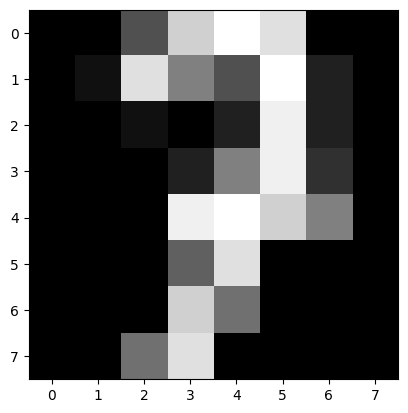

In [76]:
# 잘 맞추는지 확인
plt.imshow(x_test[11].reshape((8, 8)), cmap='gray')
print(y_test[11])

In [78]:
# 예측 한거에 11번을 꺼내기
y_pred = model(x_test)
y_pred[11]

tensor([-17.8166,  -7.1620,  -2.6029,   5.5432, -10.2335,  -6.5548, -25.2926,
         21.0026,  -6.8452,   5.3086], grad_fn=<SelectBackward0>)

In [79]:
# 확률로 변환
y_prob = nn.Softmax(1)(y_pred)
y_prob[11]

tensor([1.3837e-17, 5.8646e-13, 5.6006e-11, 1.9322e-07, 2.7185e-14, 1.0764e-12,
        7.8385e-21, 1.0000e+00, 8.0508e-13, 1.5282e-07],
       grad_fn=<SelectBackward0>)

In [81]:
for i in range(10):
    print(f'숫자 {i}일 확률: {y_prob[11][i]:.2f}') # 확율내기

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 0.00
숫자 6일 확률: 0.00
숫자 7일 확률: 1.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00
